<a href="https://colab.research.google.com/github/VSarvas/match_de_CVs/blob/main/Match_de_CVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATCH DE CURRÍCULOS COM VAGAS DE EMPREGO

## Importação dos CVs

In [ ]:
!pip install pdfplumber
import pdfplumber
import nltk

     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 5.6 MB 38.0 MB/s 
     |████████████████████████████████| 139 kB 57.1 MB/s 
     |████████████████████████████████| 1.9 MB 44.2 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=43d37d1a9a40451c9c305bd2cb007f9045c7e3a898cf3d217cdb1a36422ee987
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber


In [ ]:
arquivo_pdf = pdfplumber.open('/content/Juliana.pdf')
primeira_pagina = arquivo_pdf.pages[0]
texto_cru = primeira_pagina.extract_text()
texto_cru

'   \n \nJULIANA SCUDILIO  \n \nRODRIGUES\n  Cientista de Dados \n \n  EDUCAÇÃO \nDoutorado em Estatística - Universidade de São Paulo \n \n2016 – 2020 \nPesquisadora da Capes na área Análise de Sobrevivência/ \nPERFIL \nConfiabilidade, projeto de pesquisa em parceria com o A.C. Camargo \nCenter. Também coordenei um projeto de Credit Scoring com 12 \nSou Estatística, tenho 32 anos, tenho \nalunos para um empresa de São Carlos e fui monitora em duas \nmestrado e doutorado  em Estatística, \ndisciplinas.  \ntenho artigos publicados em revistas \n  \ninternacionais, apresentei trabalhos \nMestre em Estatística - Universidade de São Paulo \nem congressos nacionais e \n2014 - 2016 \ninternacionais. Desenvolvi vários \nPesquisadora da Capes na área de Modelos Preditivos. Projeto \nprojetos e consultorias em análise de \naplicado a fundos de Investimentos do Brasil, dados fornecido pela \ndados durante os anos de estudos. \nempresa Anbima. \nTenho facilidade em aprender novas \n \nhabilidades

In [ ]:
arquivo_pdf.metadata

{'CreationDate': "D:20200807111317-03'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20200807111317-03'00'",
 'Producer': 'Microsoft® Word para Microsoft 365'}

In [ ]:
arquivo_pdf.hyperlinks

[{'bottom': Decimal('607.640'),
  'contents': None,
  'data': {'A': {'S': /'URI',
    'Type': /'Action',
    'URI': b'http://lattes.cnpq.br/5189010086005005'},
   'BS': {'W': 0},
   'F': 4,
   'Rect': [32.3, 234.28, 172.19, 243.33],
   'StructParent': 1,
   'Subtype': /'Link'},
  'doctop': Decimal('598.590'),
  'height': Decimal('9.050'),
  'object_type': 'annot',
  'page_number': 1,
  'title': None,
  'top': Decimal('598.590'),
  'uri': 'http://lattes.cnpq.br/5189010086005005',
  'width': Decimal('139.890'),
  'x0': Decimal('32.300'),
  'x1': Decimal('172.190'),
  'y0': Decimal('234.280'),
  'y1': Decimal('243.330')},
 {'bottom': Decimal('636.780'),
  'contents': None,
  'data': {'A': {'S': /'URI',
    'Type': /'Action',
    'URI': b'https://www.linkedin.com/in/juliana-scudilio-7994362a'},
   'BS': {'W': 0},
   'F': 4,
   'Rect': [32.3, 205.14, 174.04, 214.19],
   'StructParent': 2,
   'Subtype': /'Link'},
  'doctop': Decimal('627.730'),
  'height': Decimal('9.050'),
  'object_type': 

In [ ]:
print(texto_cru)

   
 
JULIANA SCUDILIO  
 
RODRIGUES
  Cientista de Dados 
 
  EDUCAÇÃO 
Doutorado em Estatística - Universidade de São Paulo 
 
2016 – 2020 
Pesquisadora da Capes na área Análise de Sobrevivência/ 
PERFIL 
Confiabilidade, projeto de pesquisa em parceria com o A.C. Camargo 
Center. Também coordenei um projeto de Credit Scoring com 12 
Sou Estatística, tenho 32 anos, tenho 
alunos para um empresa de São Carlos e fui monitora em duas 
mestrado e doutorado  em Estatística, 
disciplinas.  
tenho artigos publicados em revistas 
  
internacionais, apresentei trabalhos 
Mestre em Estatística - Universidade de São Paulo 
em congressos nacionais e 
2014 - 2016 
internacionais. Desenvolvi vários 
Pesquisadora da Capes na área de Modelos Preditivos. Projeto 
projetos e consultorias em análise de 
aplicado a fundos de Investimentos do Brasil, dados fornecido pela 
dados durante os anos de estudos. 
empresa Anbima. 
Tenho facilidade em aprender novas 
 
habilidades e lidar com pessoas. Fiz  Bachare

## Pré-processamento de Texto

In [ ]:
# A função word_tokenize quebra o texto em palavras individuais
nltk.download('punkt')
lista_de_palavras = nltk.tokenize.word_tokenize(texto_cru)
lista_de_palavras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['JULIANA',
 'SCUDILIO',
 'RODRIGUES',
 'Cientista',
 'de',
 'Dados',
 'EDUCAÇÃO',
 'Doutorado',
 'em',
 'Estatística',
 '-',
 'Universidade',
 'de',
 'São',
 'Paulo',
 '2016',
 '–',
 '2020',
 'Pesquisadora',
 'da',
 'Capes',
 'na',
 'área',
 'Análise',
 'de',
 'Sobrevivência/',
 'PERFIL',
 'Confiabilidade',
 ',',
 'projeto',
 'de',
 'pesquisa',
 'em',
 'parceria',
 'com',
 'o',
 'A.C.',
 'Camargo',
 'Center',
 '.',
 'Também',
 'coordenei',
 'um',
 'projeto',
 'de',
 'Credit',
 'Scoring',
 'com',
 '12',
 'Sou',
 'Estatística',
 ',',
 'tenho',
 '32',
 'anos',
 ',',
 'tenho',
 'alunos',
 'para',
 'um',
 'empresa',
 'de',
 'São',
 'Carlos',
 'e',
 'fui',
 'monitora',
 'em',
 'duas',
 'mestrado',
 'e',
 'doutorado',
 'em',
 'Estatística',
 ',',
 'disciplinas',
 '.',
 'tenho',
 'artigos',
 'publicados',
 'em',
 'revistas',
 'internacionais',
 ',',
 'apresentei',
 'trabalhos',
 'Mestre',
 'em',
 'Estatística',
 '-',
 'Universidade',
 'de',
 'São',
 'Paulo',
 'em',
 'congressos',
 'nacionais'

In [ ]:
# Padronizando as palavras em lowercase
lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]
lista_de_palavras

['juliana',
 'scudilio',
 'rodrigues',
 'cientista',
 'de',
 'dados',
 'educação',
 'doutorado',
 'em',
 'estatística',
 '-',
 'universidade',
 'de',
 'são',
 'paulo',
 '2016',
 '–',
 '2020',
 'pesquisadora',
 'da',
 'capes',
 'na',
 'área',
 'análise',
 'de',
 'sobrevivência/',
 'perfil',
 'confiabilidade',
 ',',
 'projeto',
 'de',
 'pesquisa',
 'em',
 'parceria',
 'com',
 'o',
 'a.c.',
 'camargo',
 'center',
 '.',
 'também',
 'coordenei',
 'um',
 'projeto',
 'de',
 'credit',
 'scoring',
 'com',
 '12',
 'sou',
 'estatística',
 ',',
 'tenho',
 '32',
 'anos',
 ',',
 'tenho',
 'alunos',
 'para',
 'um',
 'empresa',
 'de',
 'são',
 'carlos',
 'e',
 'fui',
 'monitora',
 'em',
 'duas',
 'mestrado',
 'e',
 'doutorado',
 'em',
 'estatística',
 ',',
 'disciplinas',
 '.',
 'tenho',
 'artigos',
 'publicados',
 'em',
 'revistas',
 'internacionais',
 ',',
 'apresentei',
 'trabalhos',
 'mestre',
 'em',
 'estatística',
 '-',
 'universidade',
 'de',
 'são',
 'paulo',
 'em',
 'congressos',
 'nacionais'

In [ ]:
# Criando uma lista que contém a pontuação a ser removida

pontuacao = ['(', ')', ';', ':', '[', ']', ',', '.']
pontuacao

['(', ')', ';', ':', '[', ']', ',', '.']

In [ ]:
# Criando uma lista de stop words (a, de, um) que não tem valor como palavras
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [ ]:
# Criando uma lista de palavras sem stopwords e pontuações
keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]
keywords

['juliana',
 'scudilio',
 'rodrigues',
 'cientista',
 'dados',
 'educação',
 'doutorado',
 'estatística',
 '-',
 'universidade',
 'paulo',
 '2016',
 '–',
 '2020',
 'pesquisadora',
 'capes',
 'área',
 'análise',
 'sobrevivência/',
 'perfil',
 'confiabilidade',
 'projeto',
 'pesquisa',
 'parceria',
 'a.c.',
 'camargo',
 'center',
 'coordenei',
 'projeto',
 'credit',
 'scoring',
 '12',
 'estatística',
 '32',
 'anos',
 'alunos',
 'empresa',
 'carlos',
 'monitora',
 'duas',
 'mestrado',
 'doutorado',
 'estatística',
 'disciplinas',
 'artigos',
 'publicados',
 'revistas',
 'internacionais',
 'apresentei',
 'trabalhos',
 'mestre',
 'estatística',
 '-',
 'universidade',
 'paulo',
 'congressos',
 'nacionais',
 '2014',
 '-',
 '2016',
 'internacionais',
 'desenvolvi',
 'vários',
 'pesquisadora',
 'capes',
 'área',
 'modelos',
 'preditivos',
 'projeto',
 'projetos',
 'consultorias',
 'análise',
 'aplicado',
 'fundos',
 'investimentos',
 'brasil',
 'dados',
 'fornecido',
 'dados',
 'durante',
 'ano

In [ ]:
# Número de palavras das reviews
len(keywords)

346

In [ ]:
# Concatenar as palavras
textocv = ' '.join(s for s in keywords)
textocv

'juliana scudilio rodrigues cientista dados educação doutorado estatística - universidade paulo 2016 – 2020 pesquisadora capes área análise sobrevivência/ perfil confiabilidade projeto pesquisa parceria a.c. camargo center coordenei projeto credit scoring 12 estatística 32 anos alunos empresa carlos monitora duas mestrado doutorado estatística disciplinas artigos publicados revistas internacionais apresentei trabalhos mestre estatística - universidade paulo congressos nacionais 2014 - 2016 internacionais desenvolvi vários pesquisadora capes área modelos preditivos projeto projetos consultorias análise aplicado fundos investimentos brasil dados fornecido dados durante anos estudos empresa anbima facilidade aprender novas habilidades lidar pessoas fiz bacharel estatística - universidade federal carlos vários cursos onlines machine 2010 – 2013 learning big data power bi iniciação científica cnpq área análise programação pessoa pró- sobrevivência/confiabilidade projeto parceria hospital at

## WordCloud - Nuvem de Palavras

In [ ]:
# Gerar uma wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = '#0f54c9',
            max_font_size = 150,
            width = 1280,
            height = 720,
            colormap = 'Blues').generate(textocv)

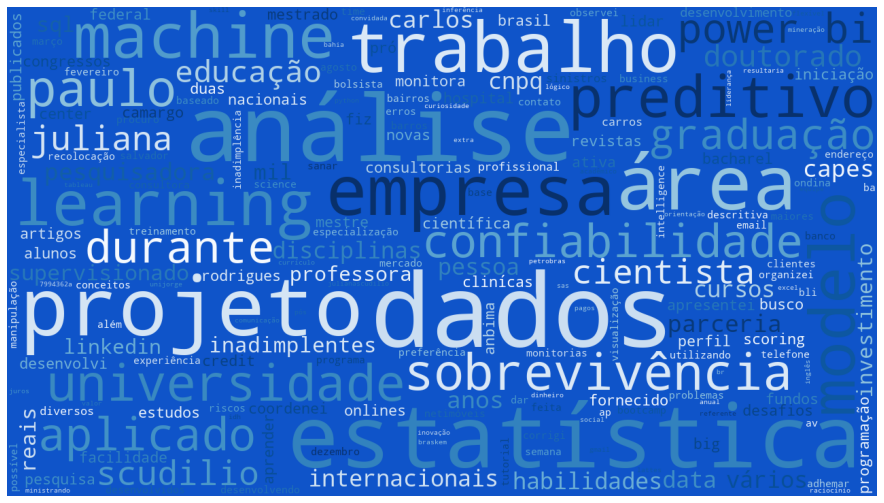

In [ ]:
# Mostrar imagem final

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16, 9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud.png')
plt.show()

In [ ]:
# Função para criação do WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_de_palavras(cv, salvar = True):
  '''
  CV: caminho de um arquivo PDF
  '''
  arquivo_pdf = pdfplumber.open(cv)
  primeira_pagina = arquivo_pdf.pages[0] # Lê apenas a primeira página
  texto_cru = primeira_pagina.extract_text()

  lista_de_palavras = nltk.tokenize.word_tokenize(texto_cru) # Transforma o texto cru em uma lista de termos
  lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras] # Deixa todas as palavras em minusculo 

  keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao] # Tira as pontuações e stopwords
  textocv = ' '.join(s for s in keywords) # Agrupa palavras em um só texto novamente

  wordcloud = WordCloud(background_color = '#0f54c9',
            max_font_size = 150,
            width = 1280,
            height = 720,
            colormap = 'Blues').generate(textocv)

  # Mostra imagem final
  fig, ax = plt.subplots(figsize = (16, 9))
  ax.imshow(wordcloud)
  ax.set_axis_off()
  plt.imshow(wordcloud)

  if salvar:
    wordcloud.to_file('wordcloud.png')

  plt.show()

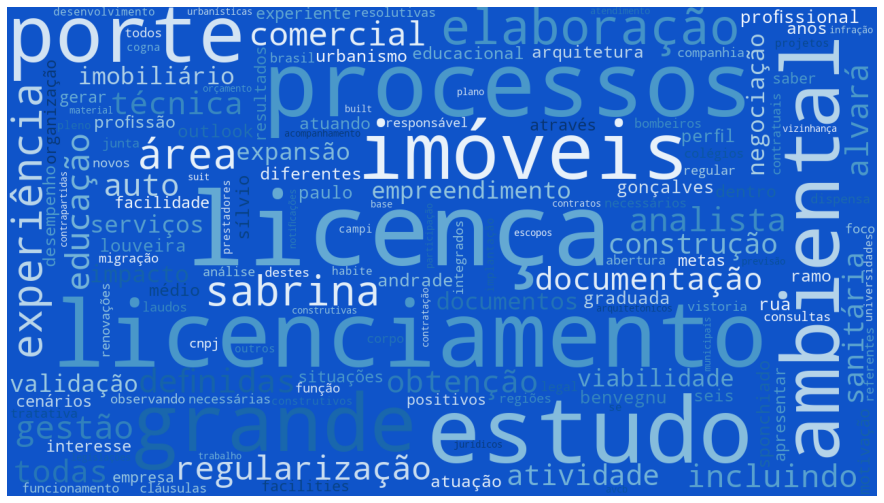

In [ ]:
nuvem_de_palavras('/content/Sabrina.pdf')

## Entrada das Vagas de Emprego

In [ ]:
import pandas as pd

vagas = pd.read_excel('vagas.xlsx', sheet_name = None)
vagas

{'ds_junior':      palavras-chave  pesos
 0       estatística      2
 1      visualização      2
 2  análise de dados      2
 3         projetos       1
 4        modelagem       1, 'ds_senior':      palavras-chave  pesos
 0            python      1
 1               sql      1
 2       linguagem r      1
 3  machine learning      2
 4       estatística      2
 5          big data      2
 6           negócio      2, 'eng_dados':   palavras-chave  pesos
 0          azure      1
 1            aws      2
 2        negócio      2
 3     dashboards      1
 4         python      1
 5            sql      1
 6            etl      2
 7     data lakes      2, 'marketing':   palavras-chave  pesos
 0      marketing      3
 1    dashboards       2
 2         growth      2
 3            sql      1
 4    estatística      1
 5        negócio      1}

In [ ]:
n_vagas = len(vagas.keys())
nome_vagas = list(vagas.keys())
n_vagas

4

In [ ]:
nome_vagas

['ds_senior', 'ds_junior', 'eng_dados', 'marketing']

In [ ]:
# Transformando a saida em uma lista de dataframes (cada dataframe representa uma vaga)
vagas = [vagas[nome_vagas[i]] for i in range(n_vagas)]

In [ ]:
vagas[0]

,palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2


In [ ]:
vaga_1 = vagas[0]
vaga_1

,palavras-chave,pesos
0,python,1
1,sql,1
2,linguagem r,1
3,machine learning,2
4,estatística,2
5,big data,2
6,negócio,2


In [ ]:
palavras_chaves = list(vaga_1['palavras-chave'])
palavras_chaves

['python',
 'sql',
 'linguagem r',
 'machine learning',
 'estatística',
 'big data',
 'negócio']

In [ ]:
# Limitando volume de palavras repetidas para pontuação da vaga Sênior

import numpy as np

limite = 5
pesos = list(vaga_1 ['pesos'])
palavras_chaves = list(vaga_1['palavras-chave'])
pmax = np.sum(np.array(pesos) * limite)
print(pmax)

55


In [ ]:
# Contando palavras-chave que ocorrem no CV

cont = [textocv.count(pc) for pc in palavras_chaves]
cont

[1, 2, 0, 2, 8, 1, 0]

In [ ]:
# Limitar pelo threshold

def aux(x):
  return x if x <= limite else limite

cont = [aux(i) for i in cont]
cont

[1, 2, 0, 2, 5, 1, 0]

In [ ]:
score = ((np.array(cont) * pesos).sum()/pmax).round(4)
score

0.3455

## Match dos CVs com as Vagas

In [ ]:
# Função entrada: CV saida, vaga - saida: score

pontuacao = ['(', ')', ';', ':', '[', ']', ',', '.']
stop_words = nltk.corpus.stopwords.words('portuguese')

def match_cv (cv, vaga, limite = 5):
  '''
  cv: caminho de um arquivo PDF
  vaga: dataset de palavras-chave e pesos
  '''
  arquivo_pdf = pdfplumber.open(cv)
  primeira_pagina = arquivo_pdf.pages[0] # Lê apenas a primeira página
  texto_cru = primeira_pagina.extract_text()

  lista_de_palavras = nltk.tokenize.word_tokenize(texto_cru) # Transforma o texto cru em uma lista de termos
  lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras] # Deixando as palavras em minusculo

  keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao] # Tira as pontuações e stopwords
  textocv = ' '.join(s for s in keywords) # Junta tudo em um só texto novamente

  pesos = list(vaga['pesos'])
  palavras_chaves = list(vaga['palavras-chave'])

  cont = [textocv.count(pc) for pc in palavras_chaves] # Conta quantas vezes cada termo da vaga aparece no texto do CV

  def aux(x, limite):
    return x if x <= limite else limite

  cont = [aux(i, limite) for i in cont] # Coloca o limite na contagem de palavras

  pmax = np.sum(np.array(pesos) * limite)

  score = ((np.array(cont) * pesos).sum()/pmax).round(4)

  return score

In [ ]:
lista_de_vagas = vagas

lista_de_cvs = ['/content/Agner.pdf',
                '/content/Juliana.pdf',
                '/content/Nayara.pdf',
                '/content/Victor.pdf',
                '/content/Rafael.pdf',
                '/content/Sabrina.pdf']

In [ ]:
# Lista de listas, cada lista interna é o score de uma pessoa nas vagas

pessoas = [[match_cv(cv, vaga) for vaga in lista_de_vagas] for cv in lista_de_cvs]
pessoas

[[0.0, 0.0, 0.0, 0.0],
 [0.3455, 0.375, 0.05, 0.14],
 [0.0364, 0.075, 0.0333, 0.32],
 [0.1818, 0.175, 0.1333, 0.06],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.025, 0.0, 0.0]]

In [ ]:
# Filtrar para pegar apenas os nomes das pessoas na lista de caminhos

nomes = [cv.split('/')[-1].split('.')[0] for cv in lista_de_cvs]

In [ ]:
# Conjunto de dados com os matchs das pessoas

matchs = pd.DataFrame(pessoas, columns = nome_vagas, index= nomes)

In [ ]:
matchs.sort_values(by = 'eng_dados', ascending = False)

,ds_senior,ds_junior,eng_dados,marketing
Victor,0.1818,0.175,0.1333,0.06
Juliana,0.3455,0.375,0.0500,0.14
Nayara,0.0364,0.075,0.0333,0.32
Agner,0.0000,0.000,0.0000,0.00
Rafael,0.0000,0.000,0.0000,0.00
Sabrina,0.0000,0.025,0.0000,0.00
